## """QSAR"""

Objective: Build a model to predict Biological activity (pIC50) against BRD4.

Data: Dataset of compounds with known biological activity against BRD4.
    Assay : Fluorescence Polarization
    Endpoint: pIC50
    Descriptors
   
Method: Linear Multiple Regression

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

scikit-learn
www.scikit-learn.org
Scikit-learn  is a free software machine learning library
for the Python programming language.
Include classification, regression and clustering algorithms 

Cite:
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

# Open Database

In [4]:
Data = pd.read_csv("Bromodomain_Histone.csv", sep = ";", index_col = "Unnamed: 0")
Data = Data.drop("Unnamed: 0.1", axis = 1)
Data.head()

,Compound's ID,CanonicalSmile,Target's bound names,Target's bound's uniprot,Test name,Activity type,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency,Biblio
0,1603,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...,BRD4,O60885,Fluorescence Polarization,pIC50,6.2,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44,21964340
1,1604,COc1cc2c3n([C@H](C)c4ccccn4)c(=O)[nH]c3cnc2cc1...,BRD4,O60885,Fluorescence Polarization,pIC50,6.1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41,21964340
2,1605,CC(=O)c1cc(-c2ccccn2)c2ccccn12,BRD4,O60885,Fluorescence Polarization,pIC50,5.0,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10,22136404
3,1606,Cc1noc(C)c1-c1ccc(C)c(c1)S(=O)(=O)NC1CC1,BRD4,O60885,Fluorescence Polarization,pIC50,5.7,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58,22136469
4,1607,COc1ccc(cc1S(=O)(=O)NC1CC1)-c1c(C)noc1C,BRD4,O60885,Fluorescence Polarization,pIC50,5.5,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05,22136469


In [5]:
#Statistical values
Data.describe()

,Compound's ID,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency,Biblio
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01
mean,1623.550000,5.245000,355.043500,2.463250,0.925000,5.825000,77.933250,3.850000,2.500000,0.335250,0.075000,0.297250,2.781750,2.212786e+07
std,12.957425,0.431426,43.940138,0.902539,0.525625,1.009887,10.338658,1.291987,0.640513,0.140256,0.266747,0.042061,0.942925,3.799218e+04
min,1603.000000,4.500000,236.090000,0.680000,0.000000,3.000000,34.370000,2.000000,2.000000,0.070000,0.000000,0.230000,0.980000,2.196434e+07
25%,1612.750000,4.900000,331.632500,1.650000,1.000000,5.000000,72.200000,3.000000,2.000000,0.210000,0.000000,0.260000,2.115000,2.213647e+07
50%,1623.500000,5.200000,354.115000,2.495000,1.000000,6.000000,77.020000,3.500000,2.000000,0.360000,0.000000,0.290000,2.975000,2.213647e+07
75%,1633.250000,5.525000,376.060000,3.160000,1.000000,6.000000,81.540000,5.000000,3.000000,0.440000,0.000000,0.330000,3.452500,2.213647e+07
max,1647.000000,6.200000,463.210000,4.120000,2.000000,8.000000,96.700000,8.000000,5.000000,0.610000,1.000000,0.380000,4.440000,2.213647e+07


In [6]:
#Data columns name
Data.columns

Index(['Compound's ID', 'CanonicalSmile', 'Target's bound names',
       'Target's bound's uniprot', 'Test name', 'Activity type', 'Activity',
       'Molecular weight', 'ALogP', 'Number of H-bond donor',
       'Number of H-bond acceptor', 'Topological surface area',
       'Number of rotatable bond', 'Number of aromatic ring',
       'Number of Carbon sp3 / Number of Carbon', 'Number of chiral centers',
       'Ligand efficiency', 'Lipophilic efficiency', 'Biblio'],
      dtype='object')

In [7]:
#Numerical Data
Data.select_dtypes(np.number).columns

Index(['Compound's ID', 'Activity', 'Molecular weight', 'ALogP',
       'Number of H-bond donor', 'Number of H-bond acceptor',
       'Topological surface area', 'Number of rotatable bond',
       'Number of aromatic ring', 'Number of Carbon sp3 / Number of Carbon',
       'Number of chiral centers', 'Ligand efficiency',
       'Lipophilic efficiency', 'Biblio'],
      dtype='object')

In [8]:
feature_names =  ['Activity', 'Molecular weight', 'ALogP',
       'Number of H-bond donor', 'Number of H-bond acceptor',
       'Topological surface area', 'Number of rotatable bond',
       'Number of aromatic ring', 'Number of Carbon sp3 / Number of Carbon',
       'Number of chiral centers', 'Ligand efficiency',
       'Lipophilic efficiency']

In [9]:
#Convert numerial data into a new DF
df_feat = Data[feature_names]
df_feat.head()

,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,6.2,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44
1,6.1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41
2,5.0,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10
3,5.7,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58
4,5.5,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05


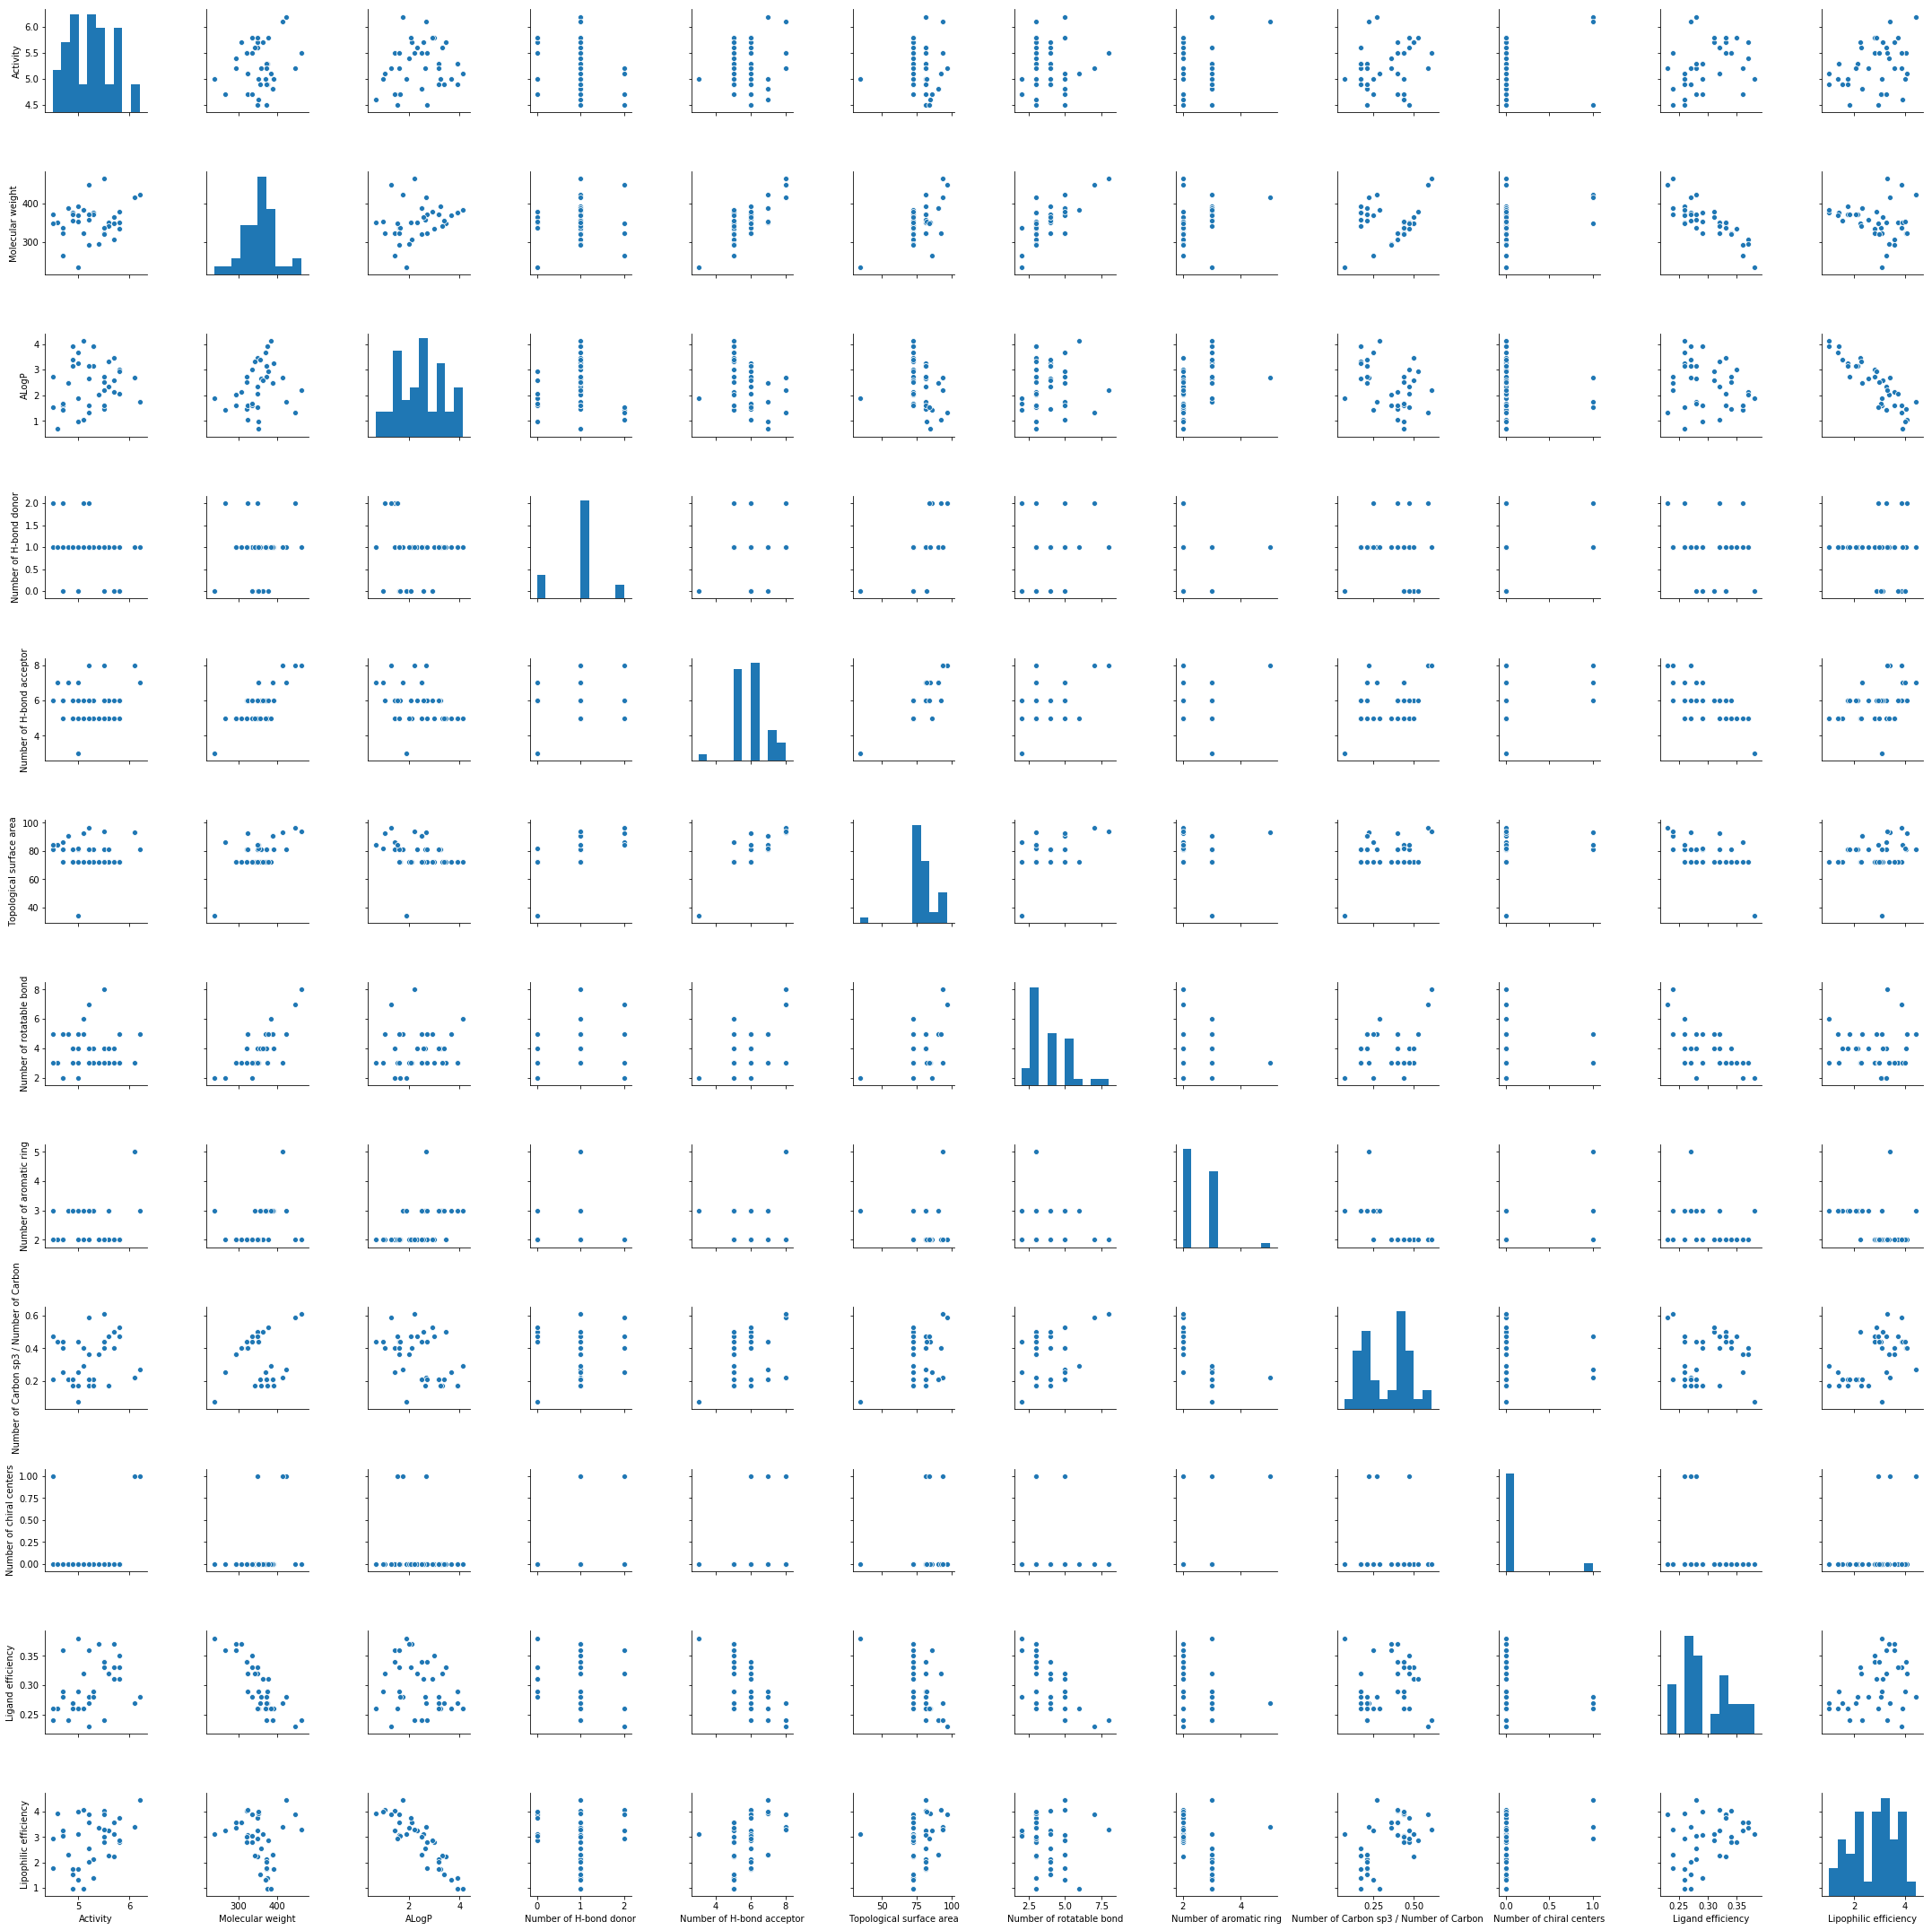

In [10]:
sns.pairplot(df_feat)

In [11]:
#correlation
Correlation = df_feat.corr()
Correlation

,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
Activity,1.000000,0.162618,0.143302,-0.256107,0.065619,-0.099175,-0.001380,0.037116,0.272703,0.237290,0.396985,0.320376
Molecular weight,0.162618,1.000000,0.286620,0.110809,0.733386,0.597859,0.698535,0.363840,0.093662,0.267612,-0.818050,-0.199939
ALogP,0.143302,0.286620,1.000000,-0.054063,-0.359165,-0.254410,0.051224,0.522723,-0.471530,-0.148015,-0.209549,-0.891603
Number of H-bond donor,-0.256107,0.110809,-0.054063,1.000000,0.119553,0.537472,0.247310,0.038080,-0.060605,0.224025,-0.195133,-0.065431
Number of H-bond acceptor,0.065619,0.733386,-0.359165,0.119553,1.000000,0.841497,0.549270,0.099100,0.343361,0.335523,-0.633370,0.373805
Topological surface area,-0.099175,0.597859,-0.254410,0.537472,0.841497,1.000000,0.519292,0.048575,0.242319,0.234395,-0.573746,0.198137
Number of rotatable bond,-0.001380,0.698535,0.051224,0.247310,0.549270,0.519292,1.000000,0.030985,0.230857,-0.040920,-0.602301,-0.049662
Number of aromatic ring,0.037116,0.363840,0.522723,0.038080,0.099100,0.048575,0.030985,1.000000,-0.763502,0.375188,-0.423529,-0.483352
Number of Carbon sp3 / Number of Carbon,0.272703,0.093662,-0.471530,-0.060605,0.343361,0.242319,0.230857,-0.763502,1.000000,-0.031355,0.145941,0.576107
Number of chiral centers,0.237290,0.267612,-0.148015,0.224025,0.335523,0.234395,-0.040920,0.375188,-0.031355,1.000000,-0.186827,0.250246


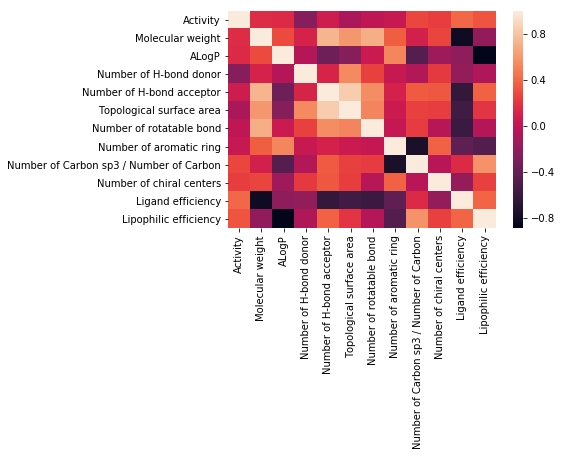

In [12]:

import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(df_feat.corr())

In [13]:
#Statistical values
df_feat.describe()

,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,5.245000,355.043500,2.463250,0.925000,5.825000,77.933250,3.850000,2.500000,0.335250,0.075000,0.297250,2.781750
std,0.431426,43.940138,0.902539,0.525625,1.009887,10.338658,1.291987,0.640513,0.140256,0.266747,0.042061,0.942925
min,4.500000,236.090000,0.680000,0.000000,3.000000,34.370000,2.000000,2.000000,0.070000,0.000000,0.230000,0.980000
25%,4.900000,331.632500,1.650000,1.000000,5.000000,72.200000,3.000000,2.000000,0.210000,0.000000,0.260000,2.115000
50%,5.200000,354.115000,2.495000,1.000000,6.000000,77.020000,3.500000,2.000000,0.360000,0.000000,0.290000,2.975000
75%,5.525000,376.060000,3.160000,1.000000,6.000000,81.540000,5.000000,3.000000,0.440000,0.000000,0.330000,3.452500
max,6.200000,463.210000,4.120000,2.000000,8.000000,96.700000,8.000000,5.000000,0.610000,1.000000,0.380000,4.440000


In [14]:
#Delete correlated variables (Avoid Overfitting)
feature_names.remove('ALogP')
feature_names.remove('Activity')
print(feature_names)

['Molecular weight', 'Number of H-bond donor', 'Number of H-bond acceptor', 'Topological surface area', 'Number of rotatable bond', 'Number of aromatic ring', 'Number of Carbon sp3 / Number of Carbon', 'Number of chiral centers', 'Ligand efficiency', 'Lipophilic efficiency']


In [15]:
#Generate new DF (Whitout correlated data)
df_feat = Data[feature_names]

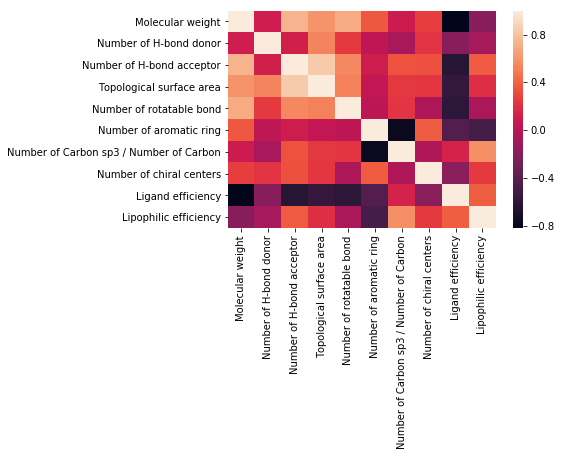

In [16]:
#Visualize new correlation matrix
Correlation = df_feat.corr()
sns.heatmap(df_feat.corr())
plt.savefig("correlacion_final.png")

In [17]:
#Convert target into a new DF
df_target = pd.DataFrame(Data['Activity'],columns=['Activity'])
df_target

,Activity
0,6.2
1,6.1
2,5.0
3,5.7
4,5.5
5,5.8
6,5.6
7,5.7
8,5.6
9,5.2


# Machine Learning Model

## Linear Regression

In [19]:
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df_target, test_size = 0.3, random_state=42)

In [22]:
X_train.head()

,Molecular weight,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
13,376.06,1,5,72.20,3,3,0.17,0,0.27,0.98
31,350.13,0,6,72.64,3,2,0.47,0,0.33,3.74
34,336.11,0,6,72.64,2,2,0.44,0,0.28,3.04
8,342.10,1,5,72.20,3,3,0.17,0,0.32,2.28
17,388.11,1,7,90.66,5,3,0.21,0,0.24,2.31


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
#Assign Model
lm = LinearRegression()

In [25]:
#Train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print(lm.intercept_)

[-4.89758328]


In [39]:
lm.coef_

array([[ 1.39568884e-02, -2.02391330e-01, -2.31378873e-01,
         1.31927157e-02,  2.01136634e-02,  2.64627134e-01,
         6.42478259e-01,  1.54614646e-01,  1.48535555e+01,
         1.10319899e-01]])

In [40]:
X_train.columns

Index(['Molecular weight', 'Number of H-bond donor',
       'Number of H-bond acceptor', 'Topological surface area',
       'Number of rotatable bond', 'Number of aromatic ring',
       'Number of Carbon sp3 / Number of Carbon', 'Number of chiral centers',
       'Ligand efficiency', 'Lipophilic efficiency'],
      dtype='object')

In [45]:
cdf = pd.DataFrame(data = lm.coef_[0],
                   index = X_train.columns,
                   columns=["Coeficiente corelación"])

In [46]:
cdf

,Coeficiente corelación
Molecular weight,0.013957
Number of H-bond donor,-0.202391
Number of H-bond acceptor,-0.231379
Topological surface area,0.013193
Number of rotatable bond,0.020114
Number of aromatic ring,0.264627
Number of Carbon sp3 / Number of Carbon,0.642478
Number of chiral centers,0.154615
Ligand efficiency,14.853555
Lipophilic efficiency,0.110320


In [47]:
lm.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

# Predictions

In [61]:
#write a function to select an specific compound
def test_compound(ID):
    test = Data[Data["Compound's ID"]== ID]
    test = test[feature_names]
    #print(test.head())
    return test

In [63]:
#Look for an specific compound
test = test_compound(1603)
test

,Molecular weight,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,423.15,1,7,81.4,5,3,0.27,1,0.28,4.44


In [64]:
#Single prediction
lm.predict(test)

array([[6.13146703]])

In [65]:
#Figure out real activity
#write a function to select an specific compound
def test_compound_Activity(ID):
    test = Data[Data["Compound's ID"]== ID]
    Activity = test["Activity"]
    #print(test.head())
    return Activity

In [72]:
activity = test_compound_Activity(1603)
activity

0    6.2
Name: Activity, dtype: float64

In [80]:
def report(ID, test, activity):
    print("Evaluation of compund ID", str(ID))
    print("Predicted activity value: ", str(lm.predict(test)[0][0]))
    print("Real activity value", str(activity))

In [81]:
report(1603, test, activity)

Evaluation of compund ID 1603
Predict activity value:  6.131467025248483
Real activity value 0    6.2
Name: Activity, dtype: float64


In [ ]:
#Predictions to compute metrics
predictions = lm.predict(X_test)

In [50]:
predictions

array([[4.8533749 ],
       [5.02430178],
       [4.74229526],
       [4.82835315],
       [5.44525341],
       [5.36748878],
       [5.41697845],
       [5.48995018],
       [5.76374496],
       [5.49721464],
       [5.42200419],
       [5.00786535]])

In [51]:
y_test

,Activity
19,4.9
16,5.2
15,4.8
26,4.7
4,5.5
12,5.3
37,5.5
27,5.4
39,5.5
6,5.6


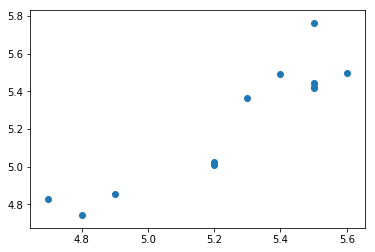

In [52]:
plt.scatter(y_test, predictions)

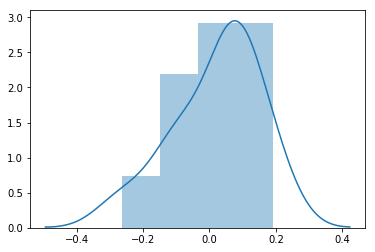

In [53]:
#histograma de residuos, deberia ser una distribución normal
sns.distplot((y_test-predictions))

# Evaluate model

In [55]:
from sklearn import metrics

In [56]:
#Compute metrics
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.11168742470895787
MSE 0.01654241459296398
RMSE 0.12861731840216534


In [ ]:
#Mean squared error